<a href="https://colab.research.google.com/github/lalan07/EDA-TESLA-CODE-PROJECT/blob/main/Copy_of_project_new_ipynd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORTING LIBRARIES**

In [2]:
# importing pandas library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




### **MOUNTING ON DRIVE**

In [4]:
# drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/EDA PROJECT/Copy of Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)

In [6]:
hotel_df = pd.read_csv(file_path)
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


                                                     CHECKING FOR COLUMNS

In [7]:
print(list(hotel_df.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [10]:
df = hotel_df.copy()

### **CLEANING THE DATA**

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

                                                   COUNTING FOR DUPLICATE ROWS

In [12]:
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

SO NUMBER OF DUPLICATE ROWS IS 31994

###                         DROPPING THE DUPLICATE ROWS

In [ ]:
df= df.drop_duplicates()

###      NOW THERE IS NO DUPLICATE ROWS

In [13]:
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [14]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

###          CHECKING FOR NUMBERS OF NULL VALUES AND THERE LOCATION

In [16]:
df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


### **Q1 Hotel which is most preffered**

Text(0.5, 1.0, 'Most prefferd hotel')

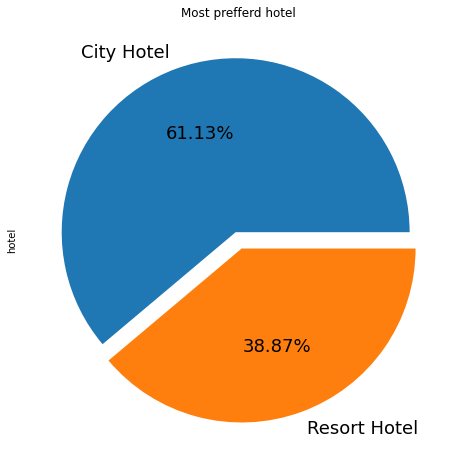

In [ ]:
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.2f%%', shadow=False, figsize=(12,8),fontsize=18)   
plt.title('Most prefferd hotel')

### **Observation: City hotel has most booking**




### **Q2.Rooms which is most preffered by customers**

Text(0.5, 1.0, 'Rooms which are most preffered')

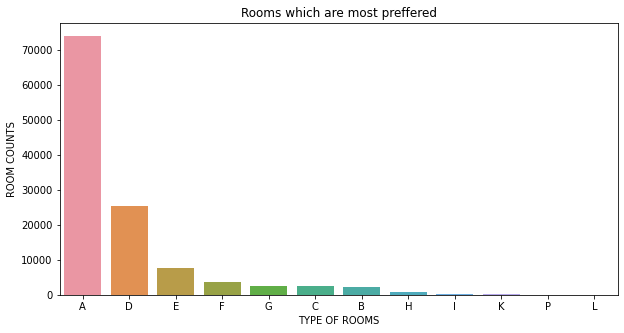

In [20]:
# PLOT SIZE
plt.figure(figsize=(10,5))
# GRAPH PLOT
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)
#  X COORDINATE SETTING
plt.xlabel('TYPE OF ROOMS')
#  Y COORDINATE SETTING
plt.ylabel('ROOM COUNTS')
# TITTLE
plt.title("Rooms which are most preffered")

### So room type A Is most preffered

### **Q3.Month where booking was at peak**

In [46]:
# Grouping by arrival date and counts
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

# list of months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=False)

# sorting by arrival date and months
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,5929
3,February,8068
7,March,9794
0,April,11089
8,May,11791
6,June,10939
5,July,12661
1,August,13877
11,September,10508
10,October,11160


### **observation:In august booking was the most**

### **Q4.Market segment that has highest cancellation rate?**

In [32]:
market_segment_df=df[df['is_canceled']==1]   # cancel=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'COUNTS'})  

market_segment_df

,market_segment,hotel,COUNTS
0,Aviation,City Hotel,52
1,Complementary,City Hotel,64
2,Complementary,Resort Hotel,33
3,Corporate,City Hotel,641
4,Corporate,Resort Hotel,351
5,Direct,City Hotel,1056
6,Direct,Resort Hotel,878
7,Groups,City Hotel,9623
8,Groups,Resort Hotel,2474
9,Offline TA/TO,City Hotel,7173


### **observation**:Online TA has highest cancellation rate

Text(0.5, 1.0, 'CANCELLATION RATE AGAINST MARKET SEGMENT')

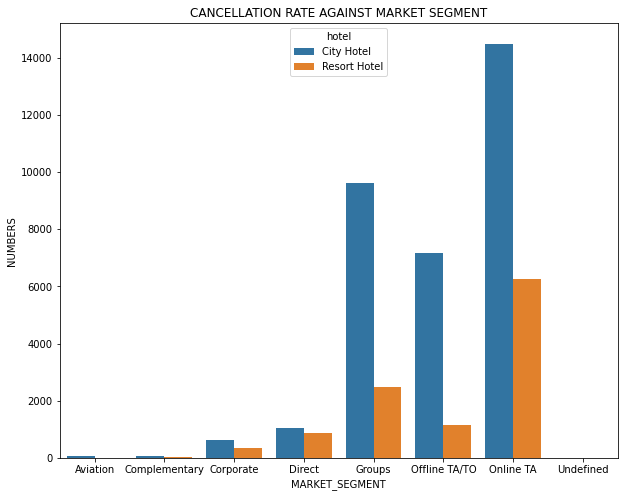

In [47]:
#setting the plot size
plt.figure(figsize=(10,8))
sns.barplot(x='market_segment',y='COUNTS',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('MARKET_SEGMENT')
plt.ylabel('NUMBERS')
plt.title('CANCELLATION RATE AGAINST MARKET SEGMENT')

### Online TA/TO has highest cancellation rate

###  **Q.5 percentage of car parking space required?**




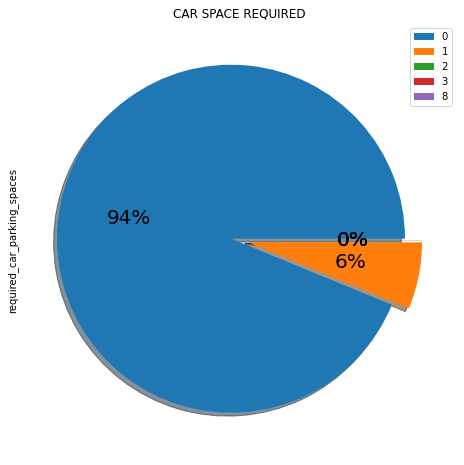

In [52]:
df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.0f%%',shadow=True,figsize=(12,8),fontsize=20,labels=None)

labels=df['required_car_parking_spaces'].value_counts().index
plt.title('CAR SPACE REQUIRED')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', labels=labels)

### **Observation**
94 % guests did not required the parking space. only 6 % guests required only 1 parking space.


### **CONCLUSION**

1.City hotel has most booking

2.So room type A Is most preffered

3.In august booking was the most

4.Online TA/TO has highest cancellation rate

5.94 % guests did not required the parking space. only 6 % guests required only 1 parking space